## TI602 - Tópicos Inovadores em Computação

#### Trabalho Final - CNN com CIFAR-10

---

#### Nomes
*   Felipe Scherer Vicentin     - 18178
*   Gustavo Henrique de Meira   - 18015
*   Gustavo Miller Santos       - 18179
*   Pedro Henrique Marques Renó - 18177

*Trabalho desenvolvido utilizando Jupyter*.

### Atividades

In [81]:
import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import utils, optimizers, regularizers, initializers

import numpy as np

import matplotlib.pyplot as plt

1. Carregamento do dataset e separação dos dados de treinamento e validação. Todos os treinamentos intermediários devem ser avaliados neste conjunto de validação.

In [2]:
cifar10 = datasets.cifar10

# Carrega os dados, que já vem divididos em conjunto de treinamento e teste.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#x_ eh uma matriz de 32x32x3 (largura, altura, RGB)
#y_ eh um vetor de vetor com o id da classificacao

170500096/170498071 [==============================] - 436s 3us/step


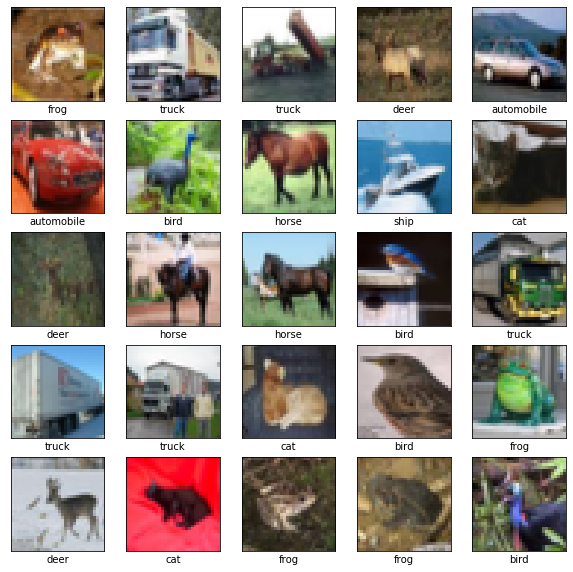

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [5]:
# Embaralha os dados e divide em 80% para treino, 20% para validação (pode utilizar outros percentuais)
nData = x_train.shape[0]  
nTrain = int(nData * 0.8)
randomIdx = np.random.permutation(np.arange(nData))
trainIdx = randomIdx[:nTrain] 
valIdx = randomIdx[nTrain:]

# Divide os dados
x_val, y_val = x_train[valIdx], y_train[valIdx]
x_train_fit, y_train_fit = x_train[trainIdx], y_train[trainIdx]

# Normalização dados entre [0, 1]
#x_train /= 255
#x_val /= 255
#x_test /= 255

x_train_fit = np.asarray(x_train_fit, dtype = np.float64) / 255
x_val = np.asarray(x_val, dtype = np.float64) / 255
x_test = np.asarray(x_test, dtype = np.float64) / 255

#print("Formato das imagens de treinamento", x_train.shape)
#print("Formato dos rótulos de treinamento", y_train.shape)
#print()

#print("Formato das imagens de validação", x_val.shape)
#print("Formato dos rótulos de validação", y_val.shape)

2. Rede neural convolucional baseline. Sugestão: comece por uma arquitetura simples

In [16]:
def gera_modelo(camadas, optimizer='adam', batch_size=32, epochs=10):
    # Baseline
    model = Sequential(camadas)

    #model.summary()

    # Criando o modelo (pode alterar os parâmetros)
    model.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),              
                   metrics=['accuracy'])

    # Fornecendo os dados de treino e retornando o history
    hist_object = model.fit(x_train_fit, y_train_fit, epochs = epochs, batch_size = batch_size, validation_data=(x_val, y_val))
    return hist_object, model

3. Explore ajustes, etc. (por exemplo o impacto de variar a quantidade de camadas de convolução e pooling, dropout, funções de ativação). Cuidado com overfitting!

In [85]:
#historyList = []
#legend = []
#models = []

#Para cada modelo, podemos especificar os parametros
parametros = []
"""
parametros.append({
                    'camadas': [
                                (Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))),
                                (MaxPooling2D((2, 2))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                (MaxPooling2D((2, 2))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                Flatten(), 
                                Dense(10, activation='softmax')
                              ]
                  }) # 65

parametros.append({
                    'camadas': [
                                (Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                (MaxPooling2D((2, 2))),
                                (Conv2D(64, (3, 3), activation='relu')),
                                Flatten(), 
                                Dense(10, activation='softmax')
                              ]
                  }) # 70

parametros.append({
                    'camadas': [
                                Dense(16, input_shape=(32, 32, 3), activation='relu'),
                                Conv2D(32, (3, 3), activation='relu', padding='same'),
                                Conv2D(64, (5, 5), activation='relu', padding='same'),
                                MaxPooling2D((2, 2), strides=2, padding='valid'),
                                Conv2D(128, (7, 7), activation='relu', padding='same'),
                                Flatten(),
                                Dense(64, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 56

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Conv2D(64, (3, 3), activation='relu'),
                                Flatten(),
                                Dense(10, activation='softmax')
                              ]
                  }) # 67


parametros.append({
                    'camadas': [
                                Dense(32, activation='selu', input_shape=(32, 32, 3)),
                                Conv2D(64, (3, 3), activation='selu'),
                                Dense(32, activation='selu'),
                                Flatten(),
                                Dense(10, activation='softmax')
                              ]
                  }) # 10

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                Conv2D(64, (5, 5), activation='selu'),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (5, 5), activation='selu'),
                                Conv2D(32, (3, 3), activation='selu'),
                                Flatten(),
                                Dense(10, activation='softmax')
                              ]
                  }) # 9

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                Conv2D(64, (3, 3), activation='relu'),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Flatten(), 
                                Dense(10, activation='softmax')
                              ]
                  }) # 50

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Conv2D(64, (4, 4), activation='relu'),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Flatten(), 
                                Dense(10, activation='softmax')
                              ]
                  }) # 62

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Dense(64, activation='relu'),
                                Conv2D(64, (3, 3), activation='relu'),
                                MaxPooling2D((2, 2)),
                                Conv2D(32, (3, 3), activation='relu'),
                                Flatten(), 
                                Dense(10, activation='softmax')
                              ]
                  }) # 55

parametros.append({
                    'camadas': [
                                Conv2D(6, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(16, (3, 3), activation='relu'),
                                MaxPooling2D((2, 2)),
                                Flatten(),
                                Dense(120, activation='relu'),
                                Dense(84, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 63

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Dropout(0.2),
                                Flatten(),
                                Dense(128, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 64

parametros.append({
                    'camadas': [
                                Conv2D(6, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                AveragePooling2D(),
                                Conv2D(16, (3, 3), activation='relu'),
                                AveragePooling2D(),
                                Flatten(),
                                Dense(120, activation='relu'),
                                Dense(84, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 53

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Dropout(0.2),
                                Flatten(),
                                Dense(128, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 71

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Dropout(0.2),
                                Flatten(),
                                Dense(64, activation='relu'),
                                Dense(128, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 64

parametros.append({
                    'camadas': [
                                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                MaxPooling2D((2, 2)),
                                Conv2D(64, (3, 3), activation='relu'),
                                Dropout(0.2),
                                MaxPooling2D((2, 2)),
                                Conv2D(32, (3, 3), activation='relu'),
                                Flatten(),
                                Dense(128, activation='relu'),
                                Dense(10, activation='softmax')
                              ]
                  }) # 59
"""

#Para cada conjunto de camada, geraremos um modelo
for id_modelo, params in enumerate(parametros):
    print("Modelo " + str(id_modelo))
    print()
    
    hist_object, model = gera_modelo(**params)
    
    historyList.append(hist_object)
    legend.append("Modelo " + str(id_modelo))
    models.append(model)
    
    print()
    print("-------------------------------------------------")
    print()

Modelo 0

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 25s 631us/sample - loss: 2.1193 - acc: 0.3320 - val_loss: 2.0453 - val_acc: 0.4128
Epoch 2/10
40000/40000 [==============================] - 25s 629us/sample - loss: 2.0369 - acc: 0.4184 - val_loss: 2.0378 - val_acc: 0.4173
Epoch 3/10
40000/40000 [==============================] - 24s 609us/sample - loss: 1.9866 - acc: 0.4696 - val_loss: 1.9800 - val_acc: 0.4751
Epoch 4/10
40000/40000 [==============================] - 24s 611us/sample - loss: 1.9518 - acc: 0.5059 - val_loss: 1.9544 - val_acc: 0.5016
Epoch 5/10
40000/40000 [==============================] - 25s 617us/sample - loss: 1.9282 - acc: 0.5286 - val_loss: 1.9283 - val_acc: 0.5321
Epoch 6/10
40000/40000 [==============================] - 24s 609us/sample - loss: 1.9067 - acc: 0.5512 - val_loss: 1.9149 - val_acc: 0.5415
Epoch 7/10
40000/40000 [==============================] - 25s 630us/sample - loss: 1.8930 - ac

4. Plote os gráficos da função de loss x número de épocas, para o treino e validação de cada modelo testado/avaliado. Houve overfitting?

In [60]:
def plot_loss_accuracy(historyList, legend, plotSet="both"):
    linestyles = ['-', '--', ':', '-.']
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

    #Plot Loss
    for idx,hist in enumerate(historyList):
        if plotSet in ["train", "both"]:
            ax1.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)])
        elif 'val_loss' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax1.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)])
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    #Plot ACC
    for idx,hist in enumerate(historyList): 
        if plotSet in ["train", "both"]:
            ax2.plot(hist.history['acc'], linestyle=linestyles[idx%len(linestyles)])
        elif 'val_acc' in hist.history.keys() and plotSet in ["valid", "both"]:
            ax2.plot(hist.history['val_acc'], linestyle=linestyles[idx%len(linestyles)])
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='center left')    
    plt.subplots_adjust(right=0.75)
    plt.show()

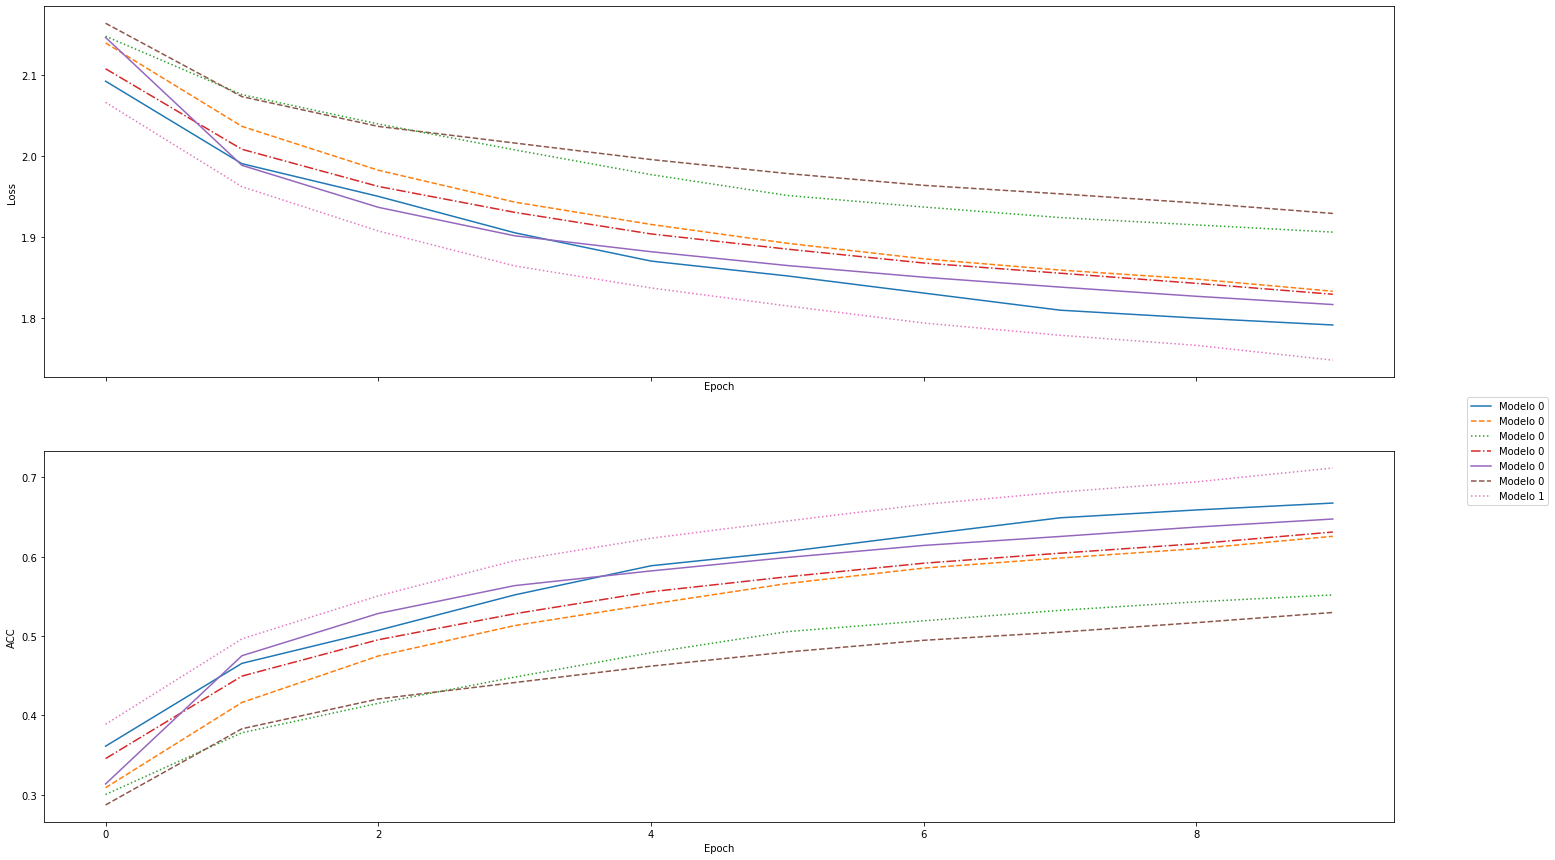

In [83]:
plt.rcParams['figure.figsize'] = (30,15) 
plot_loss_accuracy(historyList, legend, plotSet='both')

5. A partir dos experimentos acima, construa o que você considera o melhor modelo e faça a avaliação no conjunto de teste. Obs: Avaliação no conjunto de teste só pode ser executada uma única vez.